In [27]:
from utils import *
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

In [4]:
X_train, X_val, y_train, y_val, cust_group = load_data(test_size=0.0)
test_data = pd.read_csv('../input/test_all.csv', index_col=0)
all_data = pd.concat([X_train, test_data.drop(['cust_group', 'x_110', 'x_112'], axis=1)])

In [5]:
all_data.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157
cust_id,,,,,,,,,,,,,,,,,,,,,
116958,0.208333,0.872280,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,3,2
117534,0.583333,0.687978,1,1,1,1,1,1,1,1,...,1,1,1,1,1,3,3,3,2,1
112975,0.166667,0.393880,0,0,0,0,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
113903,0.395833,0.896908,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,4
118437,0.437500,0.822734,0,0,0,0,2,2,0,0,...,1,1,1,1,1,1,1,1,2,1


                数量      比例
cust_group y              
group_1    0  4544  0.9088
           1   456  0.0912
group_2    0  4871  0.9742
           1   129  0.0258
group_3    0  4894  0.9788
           1   106  0.0212


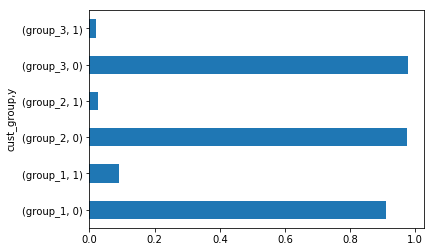

In [6]:
data = pd.read_csv('../input/train_xy.csv', index_col=0)
# data.replace(-99, np.nan, inplace=True) # 处理缺失值
tmp_df = [data.groupby(['cust_group', 'y']).size(), data.groupby(['cust_group', 'y']).size() / 5000]
df = pd.concat(tmp_df, axis=1)
df.columns = ['数量', '比例']
print(df)
# data.groupby(['cust_group', 'y']).size().plot.barh()
df['比例'].plot.barh()

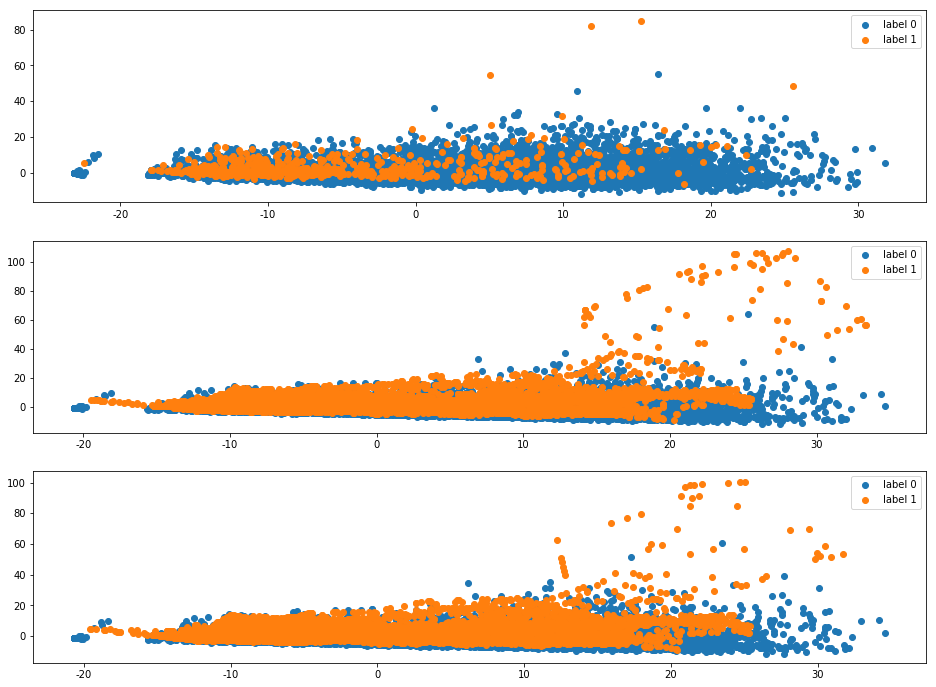

In [46]:
pca_X_train = PCA(n_components=3).fit_transform(X_train)
plt.figure(figsize=(16, 12))
plt.subplot(311)
X0 = pca_X_train[y_train == 0]
X1 = pca_X_train[y_train == 1]
plt.scatter(X0[:, 0], X0[:, 1], label='label 0')
plt.scatter(X1[:, 0], X1[:, 1], label='label 1')
plt.legend()

from imblearn.over_sampling import SMOTE, ADASYN
X_train_resampled, y_train_resampled = SMOTE().fit_sample(X_train, y_train)
# X_train.shape, y_train.shape
# X_train_resampled.shape, y_train_resampled.shape
# len(X_train_resampled[y_train_resampled == 0]), len(X_train_resampled[y_train_resampled == 1])
pca_X_train = PCA(n_components=3).fit_transform(X_train_resampled)
plt.subplot(312)
X0 = pca_X_train[y_train_resampled == 0]
X1 = pca_X_train[y_train_resampled == 1]
plt.scatter(X0[:, 0], X0[:, 1], label='label 0')
plt.scatter(X1[:, 0], X1[:, 1], label='label 1')
plt.legend()

X_train_resampled, y_train_resampled = ADASYN().fit_sample(X_train, y_train)
# X_train.shape, y_train.shape
# X_train_resampled.shape, y_train_resampled.shape
# len(X_train_resampled[y_train_resampled == 0]), len(X_train_resampled[y_train_resampled == 1])
pca_X_train = PCA(n_components=3).fit_transform(X_train_resampled)
plt.subplot(313)
X0 = pca_X_train[y_train_resampled == 0]
X1 = pca_X_train[y_train_resampled == 1]
plt.scatter(X0[:, 0], X0[:, 1], label='label 0')
plt.scatter(X1[:, 0], X1[:, 1], label='label 1')
plt.legend()


# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(16, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X0[:, 0], X0[:, 1], X0[:, 2],label='label 0')
# ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2],label='label 1')
# tmp_pca = PCA(n_components=100).fit_transform(X_train)
# tsne_X_train = TSNE(n_components=2).fit_transform(tmp_pca, n_iter=300)

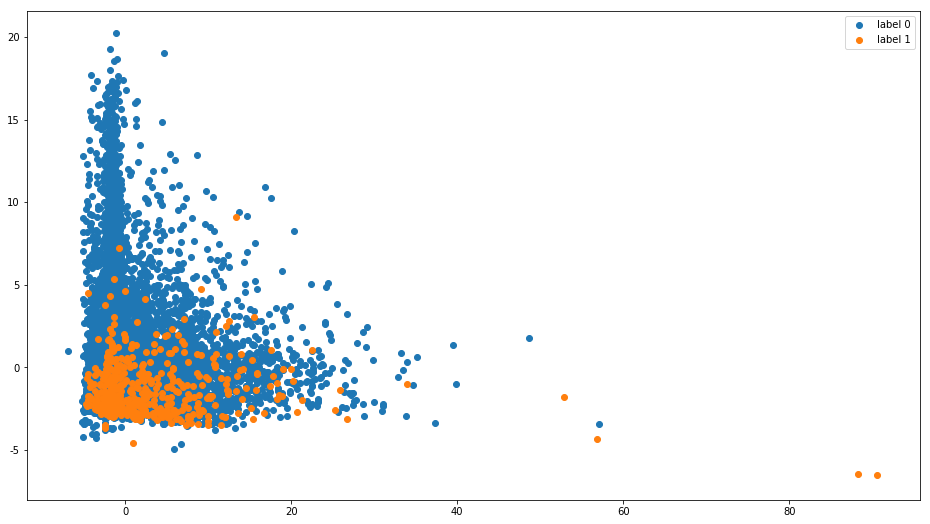

In [47]:
from sklearn.preprocessing import robust_scale
X_train_scaled = robust_scale(X_train)
pca_X_train = PCA(n_components=2).fit_transform(X_train_scaled)
plt.figure(figsize=(16, 9))
X0 = pca_X_train[y_train == 0]
X1 = pca_X_train[y_train == 1]
plt.scatter(X0[:, 0], X0[:, 1], label='label 0')
plt.scatter(X1[:, 0], X1[:, 1], label='label 1')
plt.legend()

In [23]:
X_train[y_train == 1].shape, X_train[y_train == 0].shape

((691, 155), (14309, 155))

In [7]:
print(all_data.replace(-99, np.nan).dropna(how='all', axis=0).shape)
print(all_data.replace(-99, np.nan).dropna(how='all', axis=1).shape)

(25000, 155)
(25000, 155)


{'whiskers': [<matplotlib.lines.Line2D at 0x7faf86e3f748>,
 'caps': [<matplotlib.lines.Line2D at 0x7faf86e080f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faf86e3f5c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7faf86e08940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faf86e08da0>],
 'means': []}

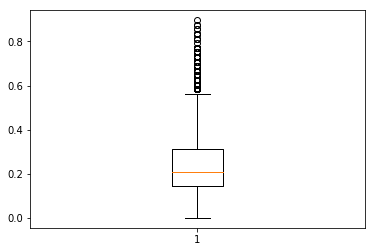

In [8]:
plt.boxplot(X_train['x_1'])

In [9]:
for each_col in X_train.columns:
    print(X_train[each_col].value_counts())

0.125000    1238
0.187500    1138
0.208333    1113
0.104167    1046
0.166667    1000
0.250000     998
0.145833     996
0.229167     959
0.270833     822
0.291667     632
0.312500     524
0.354167     495
0.333333     491
0.083333     402
0.375000     333
0.062500     296
0.395833     285
0.416667     276
0.041667     268
0.437500     197
0.500000     186
0.479167     182
0.458333     182
0.520833     169
0.541667     152
0.562500     127
0.583333     110
0.604167     103
0.625000      89
0.645833      53
0.666667      40
0.729167      19
0.687500      18
0.708333      16
0.750000      13
0.770833      11
0.833333       5
0.000000       4
0.812500       4
0.020833       2
0.875000       2
0.854167       2
0.791667       1
0.895833       1
Name: x_1, dtype: int64
0.426964    6
0.360677    6
0.568777    6
0.650957    5
0.690373    5
0.438365    5
0.431880    5
0.810422    5
0.447265    5
0.766831    5
0.724406    5
0.732756    5
0.361694    4
0.467910    4
0.777300    4
0.560893    4
0.00

In [42]:
no_nan_cols = []
gt50_cols = []
for each_col in all_data.columns:
    try:
        tmp = all_data[each_col].value_counts()[-99] / all_data[each_col].value_counts().sum()
    except:
        no_nan_cols.append(each_col)
    else:
        if 1.0 - tmp > 0.5:
            gt50_cols.append(each_col)
print(len(no_nan_cols))
print(no_nan_cols)
print(len(gt50_cols))
print(gt50_cols)
# for i in [0.5, 0.6, 0.7, 0.8, 0.9, 0.99]:
#     res = []
#     for each_col in all_data.columns:
#         try:
#             tmp = all_data[each_col].value_counts()[-99] / all_data[each_col].value_counts().sum()
#         except:
#             tmp = 1.0
#         else:
#             if i > tmp:
#                 res.append(each_col)
#     print(r'缺失值比例大于%d%%的特征: %s'% (100*i, str(res)))
# print('========================================')
# print('缺失值大于99%的特征共计：', len(res))
# for each in res:
#     print(all_data[each].value_counts())

4
['x_1', 'x_2', 'x_80', 'x_96']
110
['x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'x_79', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86', 'x_87', 'x_88', 'x_89', 'x_90', 'x_91', 'x_95', 'x_97', 'x_98', 'x_99', 'x_100', 'x_101', 'x_139', 'x_143', 'x_144', 'x_145', 'x_146', 'x_147', 'x_148', 'x_149', 'x_150', 'x_151', 'x_152', 'x_153', 'x_154', 'x_155', 'x_156', 'x_157']


In [23]:
# 找出取值全相同的特征
empty_col_list = []
constant_cnter = 0.0
for each_col in all_data.columns:
    if len(all_data[each_col].value_counts()) == 1:
        print(each_col)
        empty_col_list.append(each_col)
        constant_cnter += 1
print('取值全相同的特征共计：', constant_cnter)
print('===================================')
for each in empty_col_list:
    print(all_data[each].value_counts()[:])

x_110
x_112
取值全相同的特征共计： 2.0
-99    25000
Name: x_110, dtype: int64
-99    25000
Name: x_112, dtype: int64


In [25]:
# 找出取值只有2个的特征
two_col_list = []
constant_cnter = 0.0
for each_col in all_data.columns:
    if len(all_data[each_col].value_counts()) == 2:
        print(each_col)
        two_col_list.append(each_col)
        constant_cnter += 1
print('共计：', constant_cnter)
print('===================================')
for each in two_col_list:
    print(all_data[each].value_counts()[:])

x_6
x_12
x_18
x_23
x_28
x_34
x_92
x_94
x_96
x_102
x_107
x_113
x_114
x_116
x_118
x_126
x_129
x_132
x_134
x_135
x_137
x_138
共计： 22.0
 0     12925
-99    12075
Name: x_6, dtype: int64
 0     13193
-99    11807
Name: x_12, dtype: int64
 0     12925
-99    12075
Name: x_18, dtype: int64
 0     13193
-99    11807
Name: x_23, dtype: int64
 0     12925
-99    12075
Name: x_28, dtype: int64
 0     13193
-99    11807
Name: x_34, dtype: int64
-99    24979
 0        21
Name: x_92, dtype: int64
-99    24979
 0        21
Name: x_94, dtype: int64
1    17502
2     7498
Name: x_96, dtype: int64
-99    24997
 2         3
Name: x_102, dtype: int64
-99    24997
 0         3
Name: x_107, dtype: int64
-99    24999
 0         1
Name: x_113, dtype: int64
-99    24998
 2         2
Name: x_114, dtype: int64
-99    24999
 0         1
Name: x_116, dtype: int64
-99    24999
 0         1
Name: x_118, dtype: int64
-99    24999
 1         1
Name: x_126, dtype: int64
-99    24999
 1         1
Name: x_129, dtype: int64

In [10]:
# plt.figure(figsize=(16, 9))
# for idx, each in enumerate(X_train.columns[96:96+4]):
#     plt.subplots(220 + idx)
#     plt.barh(X_train[each].value_counts())
#     plt.title(each)

In [44]:
X_train_new = X_train[no_nan_cols + gt50_cols]
X_val_new = X_val[no_nan_cols + gt50_cols]
# X_train_new = X_train.drop(empty_col_list, axis=1)
# X_test_new = X_test.drop(empty_col_list, axis=1)
# X_train_new.head()
# X_test_new.head()

In [45]:
clf2 = LogisticRegression(penalty='l1', C=0.5)
clf2.fit(X_train, y_train)
y_pred = clf2.predict_proba(X_train)[:, 1]
y_test_pred = clf2.predict_proba(X_val)[:, 1]
auc_train = evaluate(y_train, y_pred, cust_group)
auc_test = evaluate(y_test, y_test_pred, cust_group)
print('未删除空特征列: train/test: {:.6f}/{:.6f}'.format(auc_train, auc_test))
clf1 = LogisticRegression(penalty='l1', C=0.5)
clf1.fit(X_train_new, y_train)
y_train_pred = clf1.predict_proba(X_train_new)[:, 1]
y_test_pred = clf1.predict_proba(X_val_new)[:, 1]
auc_train = evaluate(y_train, y_train_pred, cust_group)
auc_test = evaluate(y_test, y_test_pred, cust_group)
print('删除空特征列后: train/test: {:.6f}/{:.6f}'.format(auc_train, auc_test))
# X_train_new2 = X_train.drop(empty_col_list + two_col_list, axis=1)
# X_test_new2 = X_test.drop(empty_col_list + two_col_list, axis=1)
# clf4 = LogisticRegression(penalty='l1', C=0.5)
# clf4.fit(X_train_new2, y_train)
# y_train_pred = clf4.predict_proba(X_train_new2)[:, 1]
# y_test_pred = clf4.predict_proba(X_test_new2)[:, 1]
# auc_train = evaluate(y_train, y_train_pred, cust_group)
# auc_test = evaluate(y_test, y_test_pred, cust_group)
# print('删除空特征列+二值特征列: train/test: {:.6f}/{:.6f}'.format(auc_train, auc_test))

ValueError: Found array with 0 sample(s) (shape=(0, 157)) while a minimum of 1 is required.

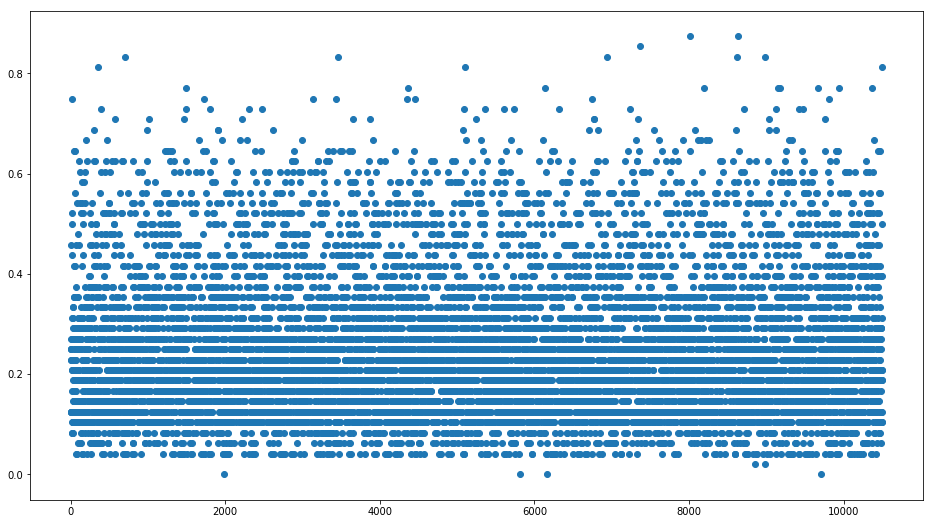

In [15]:
plt.figure(figsize=(16, 9))
plt.scatter(range(len(X_train['x_1'])), X_train['x_1'])

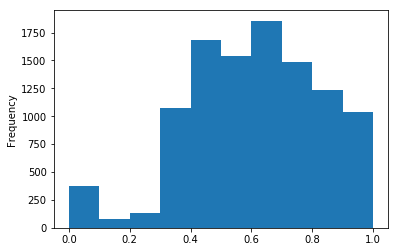

In [16]:
X_train['x_2'].plot.hist()

-99    5374
 0     5099
 1       23
 2        3
 5        1
Name: x_3, dtype: int64


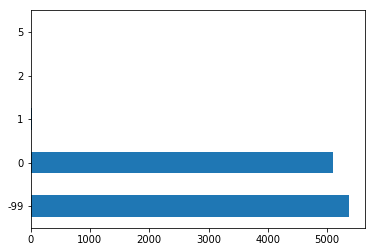

-99    5374
 0     4253
 1      701
 2      148
 3       22
 6        1
 5        1
Name: x_4, dtype: int64


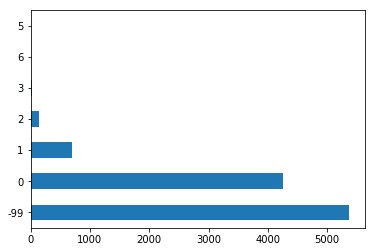

In [17]:
print(X_train['x_3'].value_counts())
X_train['x_3'].value_counts().plot.barh()
plt.show()
print(X_train['x_4'].value_counts())
X_train['x_4'].value_counts().plot.barh()
plt.show()
# X_train['x_3'].value_counts().plot.barh()

In [18]:
y_train[X_train[X_train['x_3'] == 5].index]

cust_id
112209    0
Name: y, dtype: int64

<Figure size 1152x648 with 0 Axes>

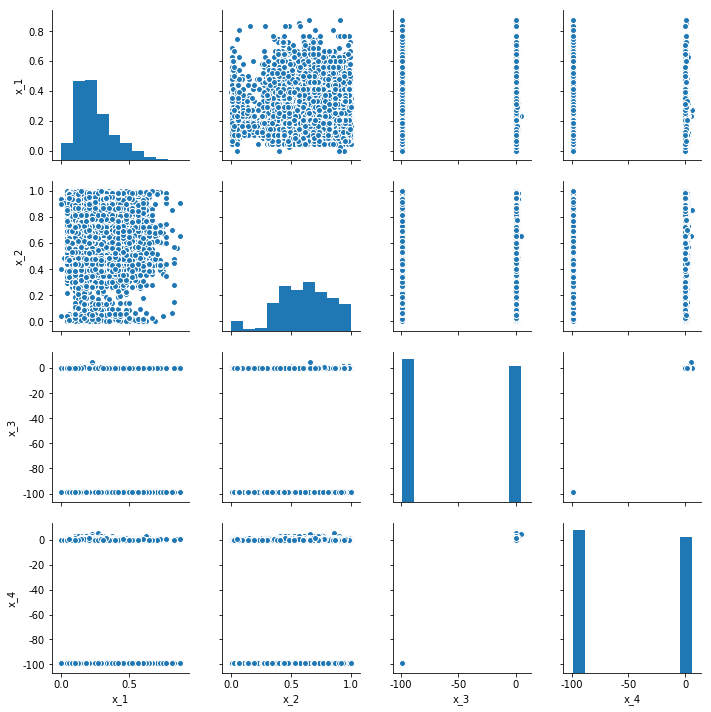

In [19]:
# plt.figure(figsize=(16, 9))
# sns.pairplot(X_train.iloc[:, :4])

In [79]:
pd.DataFrame.apply?